In [6]:
import pandas as pd
from urllib.request import urlopen
html = urlopen("http://18.215.169.239:5000/quotes").read()
df = pd.read_json(html)

In [9]:
pip install wordcloud textblob

     |████████████████████████████████| 636 kB 17.8 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline  
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob

In [12]:
df.shape

(15, 4)

In [13]:
df

,author,quote_desc,quote_id,quote_type
0,Nelson Mandela,It always seem impossible until it is done.,1,Motivation
1,Eleanor Roosevelt,With the new day comes new strength and new th...,2,Motivation
2,Mark Twain,The secret of getting ahead is getting started.,3,Motivation
3,Theodore Roosevelt,With self-discipline most anything is possible.,4,Inspiration
4,Aristotle,It is during our darkest moments that we must ...,5,Inspiration
5,Nelson Mandela,It always seem impossible until it is done.,6,Motivation
6,Eleanor Roosevelt,With the new day comes new strength and new th...,7,Motivation
7,Mark Twain,The secret of getting ahead is getting started.,8,Motivation
8,Theodore Roosevelt,With self-discipline most anything is possible.,9,Inspiration
9,Aristotle,It is during our darkest moments that we must ...,10,Inspiration


In [15]:
columns = ['author','quote_id','quote_type']

In [16]:
df = pd.DataFrame(df.drop(columns,axis=1,inplace=False))

In [17]:
df

,quote_desc
0,It always seem impossible until it is done.
1,With the new day comes new strength and new th...
2,The secret of getting ahead is getting started.
3,With self-discipline most anything is possible.
4,It is during our darkest moments that we must ...
5,It always seem impossible until it is done.
6,With the new day comes new strength and new th...
7,The secret of getting ahead is getting started.
8,With self-discipline most anything is possible.
9,It is during our darkest moments that we must ...


In [18]:
df['quote_desc'] = df['quote_desc'].astype(str)


In [19]:
df

,quote_desc
0,It always seem impossible until it is done.
1,With the new day comes new strength and new th...
2,The secret of getting ahead is getting started.
3,With self-discipline most anything is possible.
4,It is during our darkest moments that we must ...
5,It always seem impossible until it is done.
6,With the new day comes new strength and new th...
7,The secret of getting ahead is getting started.
8,With self-discipline most anything is possible.
9,It is during our darkest moments that we must ...


In [20]:
df['quote_desc'] = df['quote_desc'].apply(lambda x: " ".join(x.lower() for x in x.split()))


In [21]:
df['quote_desc'] = df['quote_desc'].str.replace('[^\w\s]','')


In [22]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [23]:
stop = stopwords.words('english')

In [24]:
df['quote_desc'] = df['quote_desc'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))


In [25]:
st = PorterStemmer()

In [26]:
df['quote_desc'] = df['quote_desc'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

In [27]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

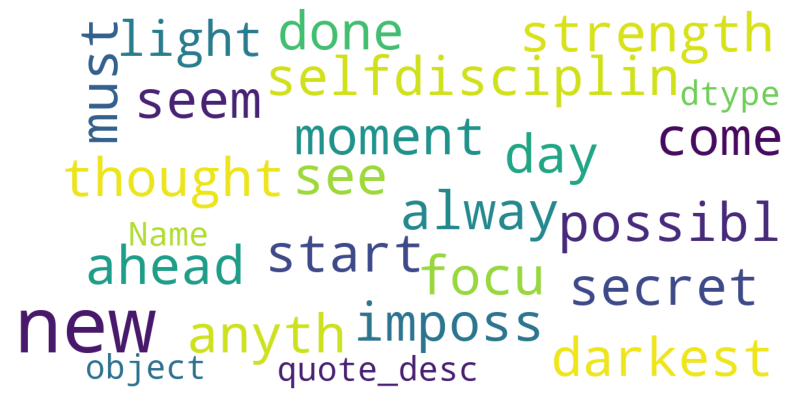

In [28]:
def show_wordcloud(col, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=500,
        max_font_size=40, 
        scale=3,
        random_state=1
    ).generate(str(col))

    fig = plt.figure(1, figsize=(14, 14))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
    wordcloud.to_file("first_review2.png")


if __name__ == '__main__':

    show_wordcloud(df['quote_desc']) 

In [29]:
pip install boto3

Note: you may need to restart the kernel to use updated packages.


In [30]:
import logging
import boto3
from botocore.exceptions import ClientError

In [32]:
import boto3
s3 = boto3.resource('s3')

In [33]:
for bucket in s3.buckets.all():
    print(bucket.name)

aws-athena-query-results-us-east-1-940830484825
aws-us-east-2-940830484825-car-jam-traffic-pipe
brochures-demo
car-trafficjam-analysis-serverlessdeploymentbuck-1k5yugkk5rqq3
cars-dev-serverlessdeploymentbucket-1ihj1gt4b4v7i
cf-templates-16hvfasxg3b5d-us-east-2
code-video-data
dtob
elasticbeanstalk-us-east-1-940830484825
empezardocumentos
front-flipbook-legaltracking
lambda-test-dev-serverlessdeploymentbucket-15vyij0gve4u
lambda-test-production-serverlessdeploymentbucket-lyi9hb1vxsb2
legaltrackingpdf
magazine-legaltracking
michimichinson
ml-pipeline-940830484825-us-east-1-mlpipeline
paginawebutmbenjamin
pedidosfaciles
profecodatos
rekognition-video-console-demo-cmh-940830484825-r3fcb3nb1gc1ff
snapshotsexample
videotrafficraw
www.deshidrogenasa.tk


In [36]:
data = open('first_review2.png', 'rb')
s3.Bucket('paginawebutmbenjamin').put_object(Key='first_review2.png', Body=data)

s3.Object(bucket_name='paginawebutmbenjamin', key='first_review2.png')